一、输入特征

    房价和哪些因素有关，很多人可能对这个问题特别敏感，随时可以列出很多，如房子面积、 房子地理位置、周边教育资源、周边商业资源、房子朝向、年限、小区情况等。
    在scikit-leam的波士顿房价数据集里，它总共收集了 13 特征，具体如下：
•CRIM 城镇人均犯罪率
•ZN 城镇超过25000平方英尺的住宅区域的占地比例
•INDUS 城镇非零售用占地比例
•CHAS 是否靠近河边，l为靠近，0为远离
•NOX 一氧化氮浓度。
•RM 每套房的平均房间个数
•AGE 1940年之前就盖好，且业主自住的房子的比例
•DIS 与波士顿市中心的距离
•RAD 周边高速公路的便利性指数
•TAX 10000美元的财产税率
•PTRATIO 小学老师的比例
•B 城镇黑人的比例
•LSTAT 地位较低的人口比例
   从这些指标里可以看到中美文化的差异。当然这个数据是在1993年之前收集的，可能和现在会有差异。当然一个模型的好坏和输入特征的选择关系密切。

In [10]:
#导入数据
from sklearn.datasets import load_boston
boston = load_boston()
X = boston.data
y = boston.target
X.shape

(506, 13)

In [11]:
X[0]

array([  6.32000000e-03,   1.80000000e+01,   2.31000000e+00,
         0.00000000e+00,   5.38000000e-01,   6.57500000e+00,
         6.52000000e+01,   4.09000000e+00,   1.00000000e+00,
         2.96000000e+02,   1.53000000e+01,   3.96900000e+02,
         4.98000000e+00])

In [12]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='<U7')

二、模型训练

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
#random_state：随机数种子：产生该组随机数的编号，在需要重复试验的时候，可以保证得到一组一样的随机数

In [16]:
import time 
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [17]:
start = time.clock()
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
cv_score = model.score(X_test, y_test)
print('elaspe: {0:0.6f};train_score: {1:0.6f};cv_score:{2:0.6f}'.format(time.clock()-start, train_score, cv_score)) #elaspe:时间

elaspe: 0.255363;train_score: 0.723941;cv_score:0.794958


三、模型优化

In [19]:
#数据归一化处理
model = LinearRegression(normalize=True)

   数据归一化处理只会加快算法收敛速度，优化算法训练的效率，无法提升算法的准确性。
   怎么样优化模型准确性呢？我们回到训练分数上来，可以观察到数据针对训练样本的评分比较低（train_score: 0.72394 ），即数据对训练数据的拟合成本比较高，这是个典型的欠拟合现象。
   优化欠拟合模型的方法，一是挖掘更多输入特征是增加多项式特征。
   我们通过使用低成本的方案，即增加多项多特征来看看能否优化模型的性能。增加多项式特征，其实就是增加模型的复杂度。

In [20]:
#编写多项式模型的函数
from  sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [21]:
def ploynomial_model(degree=1):
    ploynomial_teatures = PolynomialFeatures(degree=degree, include_bias=False)
    linear_regression = LinearRegression(normalize=True)
    pipeline = Pipeline([("ploynomial_teatures", ploynomial_teatures), ("linear_regression", linear_regression)])
    return pipeline
    
#PolynomialFeatures有三个参数
 #degree：控制多项式的次数；
 #interaction_only：默认为 False，如果指定为 True，那么就不会有特征自己和自己结合的项，组合的特征中没有 a2 和 b2；
 #include_bias：默认为 True 。如果为 True 的话，那么结果中就会有 0 次幂项，即全为1这一列。

In [22]:
#使用二阶多项式来拟合数据
model = ploynomial_model(degree=2)
start = time.clock()
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
cv_score = model.score(X_test, y_test)
print('elaspe: {0:0.6f};train_score: {1:0.6f};cv_score:{2:0.6f}'.format(time.clock()-start, train_score, cv_score))

elaspe: 0.173647;train_score: 0.930547;cv_score:0.860465


In [23]:
#使用三阶多项式来拟合数据
model = ploynomial_model(degree=3)
start = time.clock()
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
cv_score = model.score(X_test, y_test) #出现负数，模型过拟合了
print('elaspe: {0:0.6f};train_score: {1:0.6f};cv_score:{2:0.6f}'.format(time.clock()-start, train_score, cv_score))

elaspe: 0.475657;train_score: 1.000000;cv_score:-104.825038


四、学习曲线

In [36]:
from common.utils import plot_learning_curve
from sklearn.model_selection import ShuffleSplit
%matplotlib inline
import matplotlib.pyplot as plt

In [39]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plt.figure(figsize=(18, 4), dpi=200)
title = 'Learning Curves (degree={0})'
degree = [1,2,3]

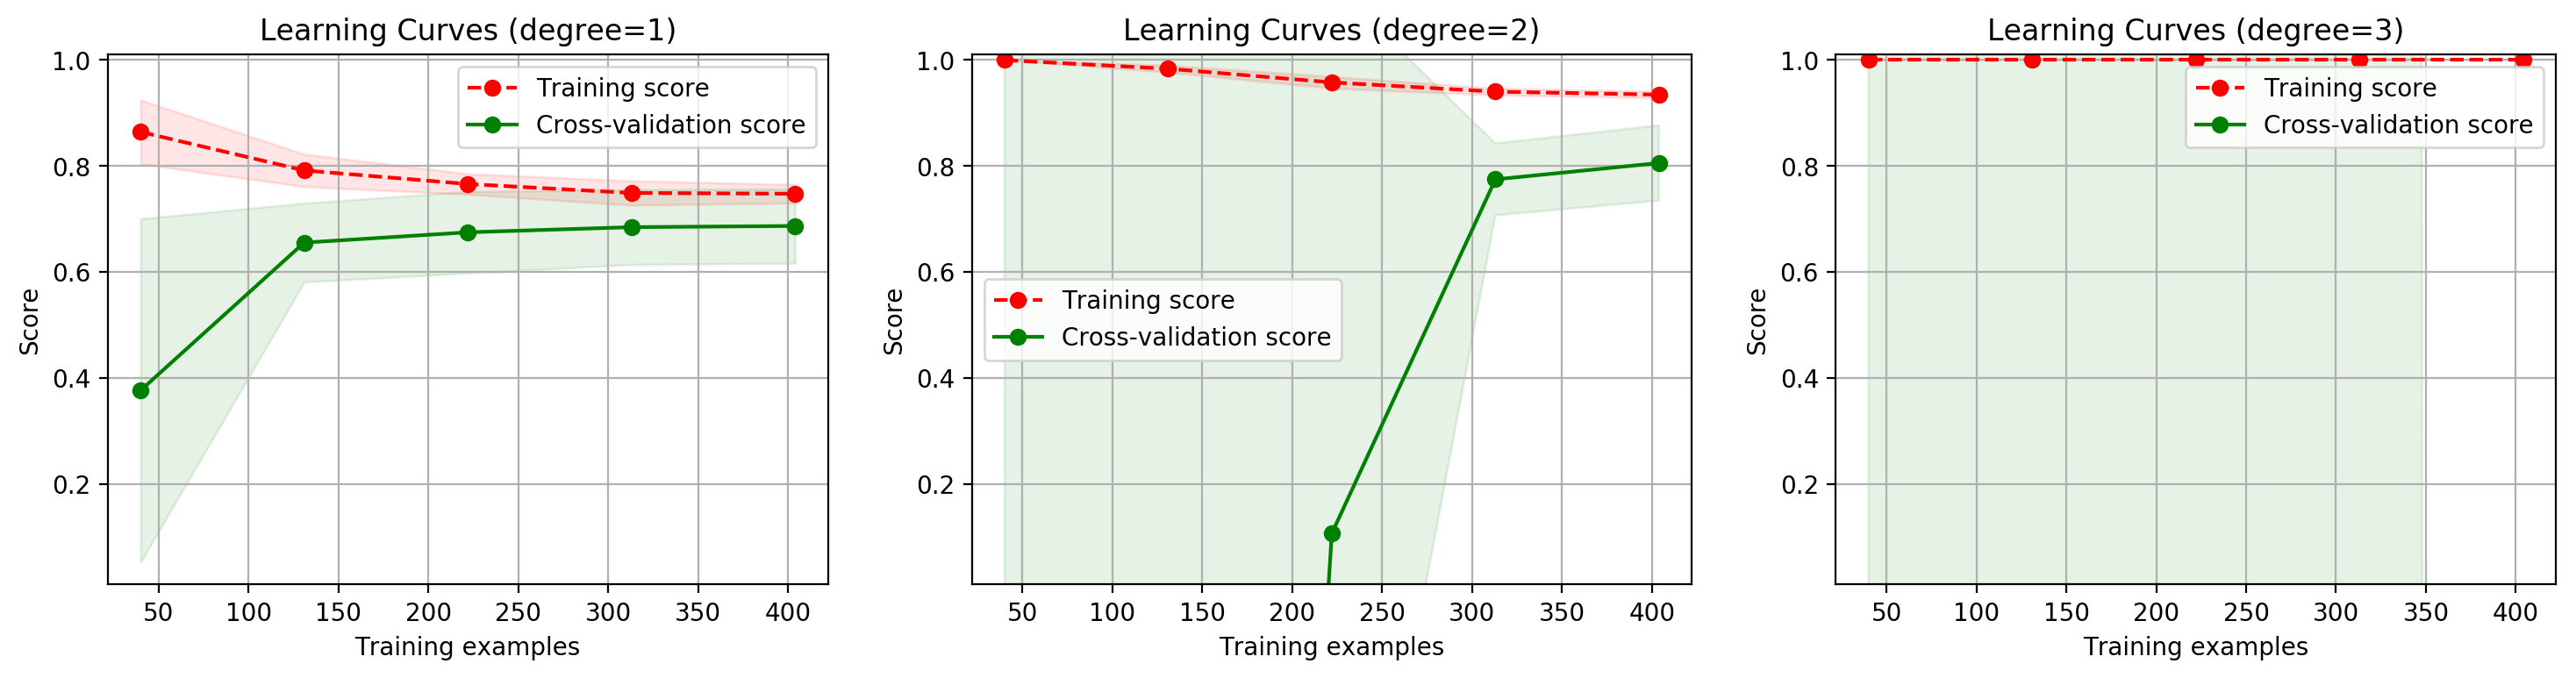

In [40]:
start = time.clock()
plt.figure(figsize=(18, 4), dpi=200)
for i in range(len(degree)):
    plt.subplot(1, 3, i + 1)
    plot_learning_curve(plt, ploynomial_model(degree[i]), title.format(degree[i]), X, y, ylim=(0.01, 1.01), cv=cv) 
    
print('elaspe: {}'.format(time.clock()-start))

   从图中可以看出，一节多项式欠拟合，因为针对训练样本的分数比较低；而三阶多项式过拟合，因为针对训练样本的分数达到1，却看不到针对交叉验证数据集的分数。
  针对二阶多项式拟合的情况，虽然比一阶多项式效果好 但从图中可以明显看出来，针对训练数据集的分数和针对交叉验证数据集的分数之间的间隙比较大，这一特征说明训练样本数据量不够，我们我们应该去采集更多的数据，以便提高模型的准确性。

In [18]:
help(LinearRegression.score)
print('--'*100)

Help on function score in module sklearn.base:

score(self, X, y, sample_weight=None)
    Returns the coefficient of determination R^2 of the prediction.
    
    The coefficient R^2 is defined as (1 - u/v), where u is the residual
    sum of squares ((y_true - y_pred) ** 2).sum() and v is the total
    sum of squares ((y_true - y_true.mean()) ** 2).sum().
    The best possible score is 1.0 and it can be negative (because the
    model can be arbitrarily worse). A constant model that always
    predicts the expected value of y, disregarding the input features,
    would get a R^2 score of 0.0.
    
    Parameters
    ----------
    X : array-like, shape = (n_samples, n_features)
        Test samples.
    
    y : array-like, shape = (n_samples) or (n_samples, n_outputs)
        True values for X.
    
    sample_weight : array-like, shape = [n_samples], optional
        Sample weights.
    
    Returns
    -------
    score : float
        R^2 of self.predict(X) wrt. y.

--------------